In [39]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import os

In [53]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=4,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=4,
    image_size=(256,256)
)

Found 14 files belonging to 2 classes.
Found 6 files belonging to 2 classes.


In [ ]:
#     labels=['bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle','theli', 'theli', 'theli', 'theli', 'theli', 'theli', 'theli'],
#     labels=['bottle', 'bottle','bottle','theli' , 'theli', 'theli'],

In [41]:
data=[]
target=[]
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            resized=cv2.resize(img,(256,256))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# data
target

[0, 0, 0, 1, 1, 1]

In [34]:
data_path ='C:\\Users\\mrhim\\trash_detection\TEST'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels)) #empty dictionary
# categories = ['bottle','theli']

In [35]:
# categories
# labels
label_dict

{'bottle': 0, 'theli': 1}

In [12]:
cwd = os.getcwd() 
cwd

'C:\\Users\\mrhim\\trash_detection'

In [42]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
# process('w.jpg',0)

In [43]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [54]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
4/4 [==============================] - 2s 229ms/step - loss: 235.4796 - accuracy: 0.4286 - val_loss: 85.0881 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 1s 163ms/step - loss: 42.8595 - accuracy: 0.5000 - val_loss: 30.1911 - val_accuracy: 0.5000
Epoch 3/15
4/4 [==============================] - 1s 162ms/step - loss: 14.6917 - accuracy: 0.6429 - val_loss: 10.0231 - val_accuracy: 0.5000
Epoch 4/15
4/4 [==============================] - 1s 167ms/step - loss: 1.2347 - accuracy: 0.8571 - val_loss: 33.1518 - val_accuracy: 0.6667
Epoch 5/15
4/4 [==============================] - 1s 158ms/step - loss: 5.2210 - accuracy: 0.7143 - val_loss: 10.7988 - val_accuracy: 0.8333
Epoch 6/15
4/4 [==============================] - 1s 158ms/step - loss: 4.6799 - accuracy: 0.8571 - val_loss: 14.2636 - val_accuracy: 0.5000
Epoch 7/15
4/4 [==============================] - 1s 161ms/step - loss: 10.4571 - accuracy: 0.7857 - val_loss: 40.3473 - val_accuracy: 0.6667
Epoch 8/

In [59]:
import cv2

In [60]:
test_img = cv2.imread('222.jpg')

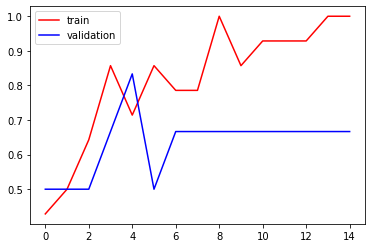

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

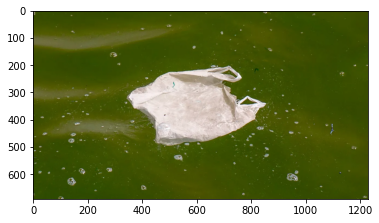

In [62]:
plt.imshow(test_img)

In [63]:
test_img.shape

(691, 1229, 3)

In [64]:
test_img = cv2.resize(test_img,(256,256))

In [65]:
test_input = test_img.reshape((1,256,256,3))

In [66]:
model.predict(test_input)

1/1 [==============================] - 0s 131ms/step


array([[1.7638089e-35]], dtype=float32)

In [19]:
import pickle

In [20]:
pickle.dump(model,open('model.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    